In [1]:
import lsst.afw.image as afwImage

In [2]:
import lsst.obs.decam as obs_decam

In [3]:
import os
import numpy as np
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import lsst.afw.geom as afwGeom
import lsst.afw.geom.ellipses as afwEllipse
import lsst.afw.cameraGeom as cameraGeom

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (13, 8) if False else (10, 6)

# data_path = '/nfs/lsst2/photocalData/data/decam/rerun/2'

In [5]:
# butler = dafPersist.Butler(os.path.join("/Users/photocal/data/decam", "rerun",
#                                         "2" if True else "rhl/tmp"))

# data_path = '/nfs/lsst2/photocalData/data/rerun/2'
#                /nfs/lsst2/photocalData/data/decam/rerun/2

# butler = dafPersist.Butler(data_path)

butler = dafPersist.Butler(os.path.join('/nfs/lsst2/photocalData/data/decam/rerun/',
                                        "4" if True else "rhl/tmp"))

In [6]:
import lsst.afw.display.ds9 as display
import lsst.afw.cameraGeom.utils as camGeomUtils
camGeomUtils = reload(camGeomUtils)

camera = butler.get("camera")
# frame, visit = 1, 496577
frame, visit = 1, 496473

# frame, visit = 1, 496372

# product = 'calexp'
product = 'postISRCCD'
# product = 'raw'

date = '2015-11-25'
filter = 'r'

# imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True)
imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True, date=date, filter=filter)

try:
    mos
except NameError:
    mos = dict()

mos['496473-1'] = camGeomUtils.showCamera(camera, imageSource=imageSource, title=str(visit), binSize=8)#,
#                                      frame=frame)#, ccdKey="ccdnum")

Reading 1: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 1}: 2 matches
Reading 2: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 2}: 2 matches
Reading 3: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 3}: 2 matches
Reading 4: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 4}: 2 matches
Reading 5: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 5}: 2 matches
Reading 6: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 6}: 2 matches
Reading 7: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 7}: 2 matches
Reading 8: No unique lookup for ['ccdnum'] from {'filter': 'r', 'date': '2015-11-25', 'visit': 496473, 'ccd': 8}: 2 matches
Reading 

In [ ]:
# names = camera.()
# for name in names: print name

print camera.getFpBBox()


In [ ]:
dataId = dict(visit=496495)

for ccdnum in range(1, 63):
#     try:
    calexp = butler.get("calexp", dataId, ccdnum=ccdnum, immediate=True)
#     except Exception:
#         continue
    
    print calexp.getDetector().getName(), calexp.getDetector().getId()

In [ ]:
dataId = dict(visit=496495, ccdnum=18)
src = butler.get("src", dataId, immediate=True)
calexp = butler.get("calexp", dataId)
if False:
    ds9.mtv(calexp)
else:
    ds9.erase()
with ds9.Buffering():
    for s in src:
        if s.getFootprint().getNpix() > 1000:
            ellip = s.getShape()
            ellip = afwEllipse.Axes(ellip)

            if ellip.getDeterminantRadius() > 10:
                ds9.dot('o', *s.getCentroid(), size=10)
                print s.getCentroid()

In [ ]:
ccdName = 'N11'
ccdnum = [_.getId() for _ in camera if _.getName() == ccdName][0]

dataId = dict(visit=496559, ccdnum=ccdnum)
calexp = butler.get("raw", dataId)
srcs = butler.get("src", dataId)

frame = 0
if True:
    ds9.mtv(calexp, frame=frame, 
            title='%d %s' % (dataId["visit"], calexp.getDetector().getName()))
else:
    ds9.erase(frame=frame)
    
if False:
    with ds9.Buffering():
        for s in srcs:
            if s.getModelFlux() > 1e6:
                ellip = s.getShape()
                ellip = afwEllipse.Axes(ellip)

                if ellip.getA() > 10 and ellip.getB() > 5:
                    ds9.dot(ellip, *s.getCentroid(), frame=frame, size=20)
                    #ds9.dot('%g' % s.getModelFlux(), *s.getCentroid(), frame=frame)
                    ds9.dot('%.1f %.1f' % (ellip.getA(), ellip.getB()), *s.getCentroid(), frame=frame)

In [ ]:
nid = dict([(_.getName(), _.getId()) for _ in camera])
print nid['S16']

In [ ]:
import lsst.afw.image as afwImage
import lsst.afw.display as afwDisplay
import numpy as np



data = np.zeros((10,10), dtype=np.float32)
img = afwImage.ImageF(data)
afwDisplay.ds9.mtv(img,frame=0)

In [141]:
print mos

{496577: <lsst.afw.image.imageLib.ImageF; proxy of <Swig Object of type 'boost::shared_ptr< lsst::afw::image::Image< float > > *' at 0x7f48e6102c90> >}


In [143]:
ds9.mtv(mos[496577])

In [145]:
ds9.mtv(mos[496372], frame=1)

In [148]:
ds9.mtv(mos['496577-3'], frame=1)

In [150]:
ds9.mtv(mos['496577-4'], frame=2)

In [159]:
ds9.mtv(mos['496577-5'], frame=3)

In [162]:
ds9.mtv(mos['496577-6'], frame=4)

In [179]:
# ds9.mtv(mos['496577-7'], frame=5)
ds9.mtv(mos['496473-1'], frame=5)

In [175]:
import lsst.afw.display.ds9 as display
import lsst.afw.cameraGeom.utils as camGeomUtils
camGeomUtils = reload(camGeomUtils)

camera = butler.get("camera")
frame, visit = 1, 496473
# frame, visit = 1, 496372

# product = 'calexp'
product = 'postISRCCD'
# product = 'raw'

date = '2015-11-26'
filter = 'r'

# imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True)
# imageSource = camGeomUtils.ButlerImage(butler, product, visit=visit, verbose=True, date=date, filter=filter)

im = butler.get(product, visit=496473, ccdnum=20)

ds9.mtv(im, frame=1)
# imageSource.

# try:
#     mos
# except NameError:
#     mos = dict()

# mos['496577-7'] = camGeomUtils.showCamera(camera, imageSource=imageSource, title=str(visit), binSize=8)#,
# #                                      frame=frame)#, ccdKey="ccdnum")

In [181]:
%matplotlib inline

AttributeError: Unknown property figsize

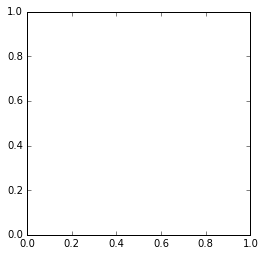

In [185]:
plt.imshow(mos['496473-1'].getArray(),cmap = 'gray', figsize=(10,10))

In [200]:
ds9.pan(420,1779, frame=5)

In [198]:
data = np.zeros((10,10), dtype = np.float32)
img = afwImage.ImageF(data)
ds9.mtv(img,frame=6)